## Import data, utils and algorithms ##

In [ ]:
import pandas as pd
from utils import FEATURES, MODEL_KWARGS
from clustering import Clustering
import matplotlib.pyplot as plt
import seaborn as sns


valid_models = ['kmeans', 'gmm', 'hierarchical']
model_type = 'hierarchical'  # or 'kmeans', 'gmm'
assert model_type in valid_models, f"model_type must be one of {valid_models}, got {model_type}"
data = pd.read_csv('data/data_pre_processed.csv')


## Example use for single fit ##

In [2]:
model = Clustering(model_type, data, FEATURES, **MODEL_KWARGS[model_type])
labels = model.get_labels()
print(labels[0:35])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


## Get optimal number of clusters for each model ##

In [3]:
kmeans = Clustering('kmeans', data, FEATURES, **MODEL_KWARGS['kmeans'])
gmm = Clustering('gmm', data, FEATURES, **MODEL_KWARGS['gmm'])
hierarchical = Clustering('hierarchical', data, FEATURES, **MODEL_KWARGS['hierarchical'])


Finding optimal K for Kmeans:   0%|          | 0/19 [00:00<?, ?k/s]

Finding optimal K for Kmeans: 100%|██████████| 19/19 [00:04<00:00,  3.86k/s, K=20]


Gap-statistic: optimal K = 5


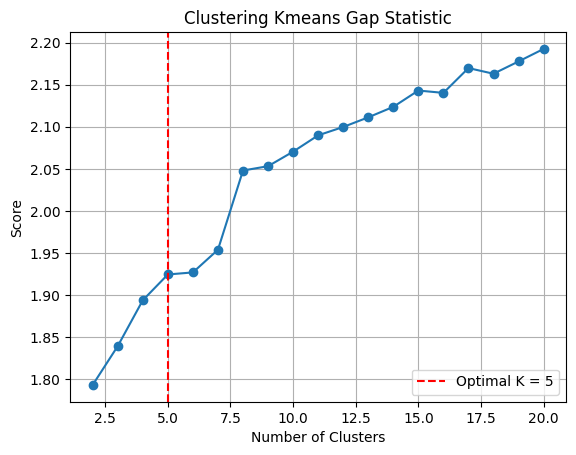

In [4]:
optimal_k, scores = kmeans.get_optimal_k(k_min=2, k_max=20, method='gap', n_sim=40, verbose=True)
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Kmeans Gap Statistic")
plt.legend()
plt.grid(True)
plt.show()

Finding optimal K for Gmm: 100%|██████████| 19/19 [00:00<00:00, 21.95k/s, K=20]


GMM-BIC: optimal K = 3 (BIC = 9247.33)


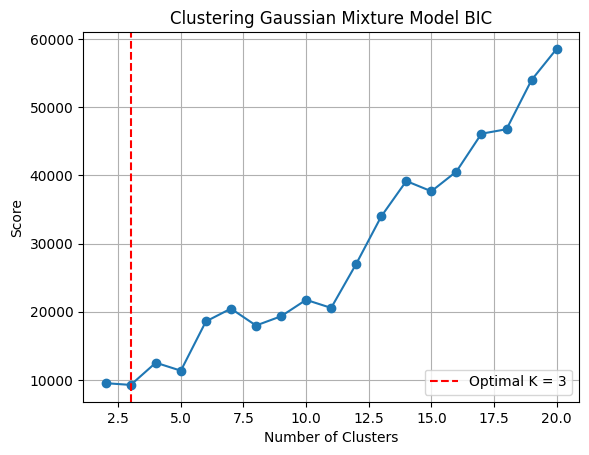

In [5]:
optimal_k, scores = gmm.get_optimal_k(k_min=2, k_max=20, method='bic', verbose=True)
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Gaussian Mixture Model BIC")
plt.legend()
plt.grid(True)
plt.show()

Finding optimal K for Hierarchical: 100%|██████████| 19/19 [00:00<00:00, 61.04k/s, K=20]


Silhouette: optimal K = 2 (score = 0.182)


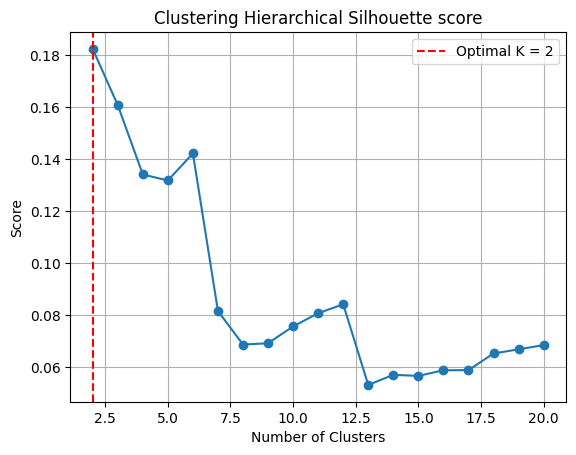

In [6]:
optimal_k, scores = hierarchical.get_optimal_k(k_min=2, k_max=20, method='silhouette', verbose=True)
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Hierarchical Silhouette score")
plt.legend()
plt.grid(True)
plt.show()

Finding optimal K for Kmeans: 100%|██████████| 19/19 [00:00<00:00, 48.47k/s, K=20]


Silhouette: optimal K = 2 (score = 0.382)


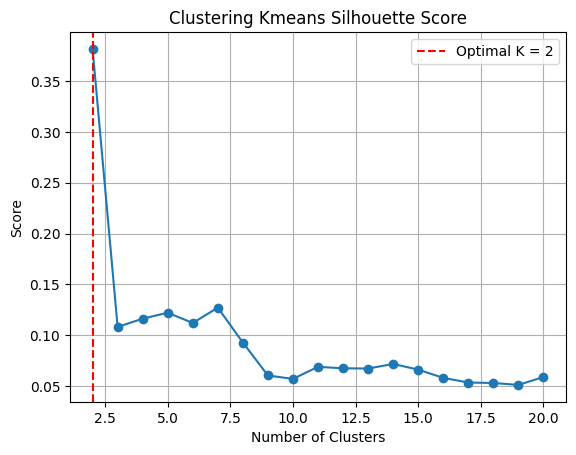

In [7]:
optimal_k, scores = kmeans.get_optimal_k(k_min=2, k_max=20, method='silhouette', n_sim=40, verbose=True)
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.axvline(optimal_k, color='red', linestyle='--', label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Kmeans Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

# Sum of squared distances and Silhouette coefficient as a function of the number of clusters 

Inertia vs K: 100%|██████████| 19/19 [00:00<00:00, 60.04it/s, Inertia=7e+3]   


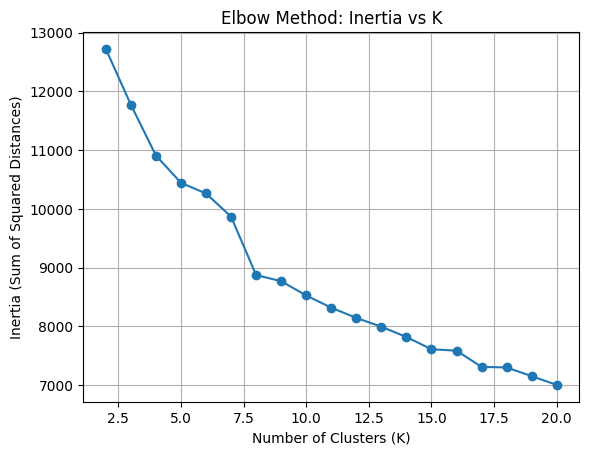

In [8]:
inertias = kmeans.get_inertia_for_k_range(k_min=2, k_max=20)
plt.plot(list(inertias.keys()), list(inertias.values()), marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method: Inertia vs K")
plt.grid(True)
plt.show()


Finding optimal K for Kmeans: 100%|██████████| 19/19 [00:00<00:00, 69.05k/s, K=20]


Silhouette: optimal K = 2 (score = 0.382)


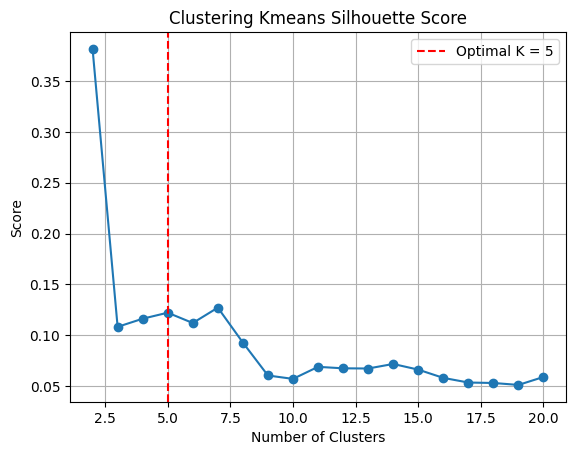

In [9]:
optimal_k, scores = kmeans.get_optimal_k(k_min=2, k_max=20, method='silhouette', n_sim=40, verbose=True)
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.axvline(5, color='red', linestyle='--', label=f"Optimal K = {5}")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Clustering Kmeans Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Considering we want the minimum sum of squared distances and the maximum Silhouette coefficient, the optimal number of clusters seems to be five

## Estimate feature importance using a cluster-based weighting technique. ## 

In [31]:
MODEL_KWARGS['kmeans']['n_clusters'] = 5
MODEL_KWARGS

{'kmeans': {'n_clusters': 5, 'random_state': 0},
 'hierarchical': {'n_clusters': 4, 'linkage': 'ward'},
 'gmm': {'n_components': 4, 'random_state': 0}}

In [32]:
kmeans = Clustering('kmeans', data, FEATURES, **MODEL_KWARGS['kmeans'])
importances = kmeans.feature_importance_via_wcss()
print("Feature importances (via ΔWCSS):", importances)


Feature importances (via ΔWCSS): {'Cohort': 0.012914950068810696, 'Individual': 0.007195152053451883, 'Round': 0.015134718083256267, 'Phase': 0.014603728292131204, 'Puzzler': 0.015740212721364694, 'HR_TD_Mean': 0.014555407407928826, 'HR_TD_Median': 0.015481411328971259, 'HR_TD_std': 0.014492728348290058, 'HR_TD_Min': 0.014514336760614081, 'HR_TD_Max': 0.015460302381764643, 'HR_TD_AUC': 0.014532673722969545, 'HR_TD_Kurtosis': 0.014482254084734428, 'HR_TD_Skew': 0.01448370200199549, 'HR_TD_Slope_min': 0.015465394635512456, 'HR_TD_Slope_max': 0.013446279315317658, 'HR_TD_Slope_mean': 0.015459247834407355, 'HR_TD_Slope': 0.015457860435896207, 'TEMP_TD_Mean': 0.014771363744003665, 'TEMP_TD_Median': 0.014682510770150828, 'TEMP_TD_std': 0.014492688614667494, 'TEMP_TD_Min': 0.014767843766137104, 'TEMP_TD_Max': 0.014684953600062653, 'TEMP_TD_AUC': 0.015116071028501618, 'TEMP_TD_Kurtosis': 0.01448034823693429, 'TEMP_TD_Skew': 0.015239853509972371, 'TEMP_TD_Slope_min': 0.01450125405648854, 'TEMP_

In [33]:
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_features = [feature for feature, _ in sorted_importances]
sorted_importances


[('Frustrated', 0.015830728517626777),
 ('hostile', 0.01580709528754064),
 ('afraid', 0.01580705643348577),
 ('Puzzler', 0.015740212721364694),
 ('nervous', 0.015710993132307578),
 ('upset', 0.015687560117836074),
 ('EDA_TD_P_std', 0.015635741632707624),
 ('EDA_TD_T_std', 0.015623801351839455),
 ('HR_TD_Median', 0.015481411328971259),
 ('EDA_TD_P_Peaks', 0.01546714751152317),
 ('HR_TD_Slope_min', 0.015465394635512456),
 ('HR_TD_Max', 0.015460302381764643),
 ('HR_TD_Slope_mean', 0.015459247834407355),
 ('HR_TD_Slope', 0.015457860435896207),
 ('EDA_TD_T_Slope', 0.015442841318849978),
 ('EDA_TD_T_Slope_mean', 0.015437807496885109),
 ('EDA_TD_T_Slope_max', 0.015435000514772246),
 ('EDA_TD_T_Slope_min', 0.015424031771264512),
 ('EDA_TD_P_AUC', 0.015402033344479897),
 ('EDA_TD_P_Mean', 0.015400334424514444),
 ('determined', 0.015378844889967491),
 ('EDA_TD_P_Median', 0.015371799765813767),
 ('EDA_TD_P_Slope_mean', 0.015361036130554406),
 ('EDA_TD_P_Slope', 0.015349370451964784),
 ('EDA_TD_P_

In [34]:
def plot_feature_importance(importances, normalize=True, title="Feature Importance via WCSS"):
    """
    Visualizes feature importance as computed by change in WCSS.
    """
    # Optionally normalize
    if normalize:
        total = sum(importances.values())
        importances = {k: v / total for k, v in importances.items()}

    # Sort by importance
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
    features, scores = zip(*sorted_importances)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(scores), y=list(features), palette="viridis")
    plt.xlabel("Importance" + (" (Normalized)" if normalize else " (Δ WCSS)"))
    plt.ylabel("Feature")
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

/var/folders/pp/80vw7fpx7jd29s0z090063840000gn/T/ipykernel_97517/2129623098.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(features), palette="viridis")


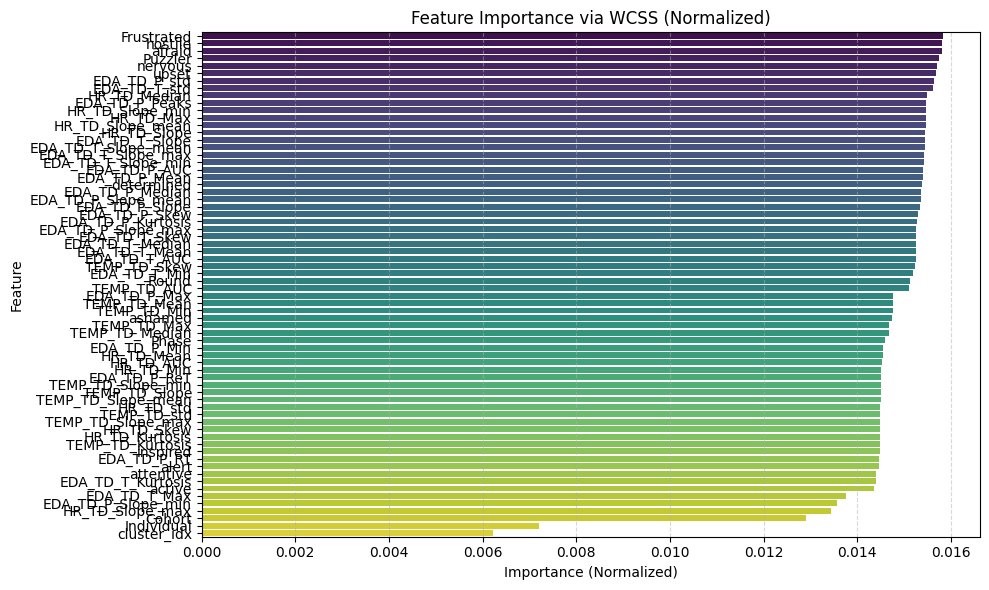

In [35]:
plot_feature_importance(importances, normalize=True, title="Feature Importance via WCSS (Normalized)")

In [36]:
def plot_top10_feature_importance(importances, normalize=True, title="Top 10 Feature Importances via WCSS"):
    """
    Visualizes the top 10 feature importances as computed by change in WCSS.

    Parameters:
    - importances: dict, feature name -> Δ WCSS or normalized importance
    - normalize: bool, whether to normalize importances to sum to 1
    - title: str, plot title
    """
    # Optionally normalize
    if normalize:
        total = sum(importances.values())
        importances = {k: v / total for k, v in importances.items()}

    # Sort and slice top 10
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:10]
    features, scores = zip(*sorted_importances)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(scores), y=list(features), palette="rocket")
    plt.xlabel("Importance" + (" (Normalized)" if normalize else " (Δ WCSS)"))
    plt.ylabel("Feature")
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


/var/folders/pp/80vw7fpx7jd29s0z090063840000gn/T/ipykernel_97517/2912562287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(features), palette="rocket")


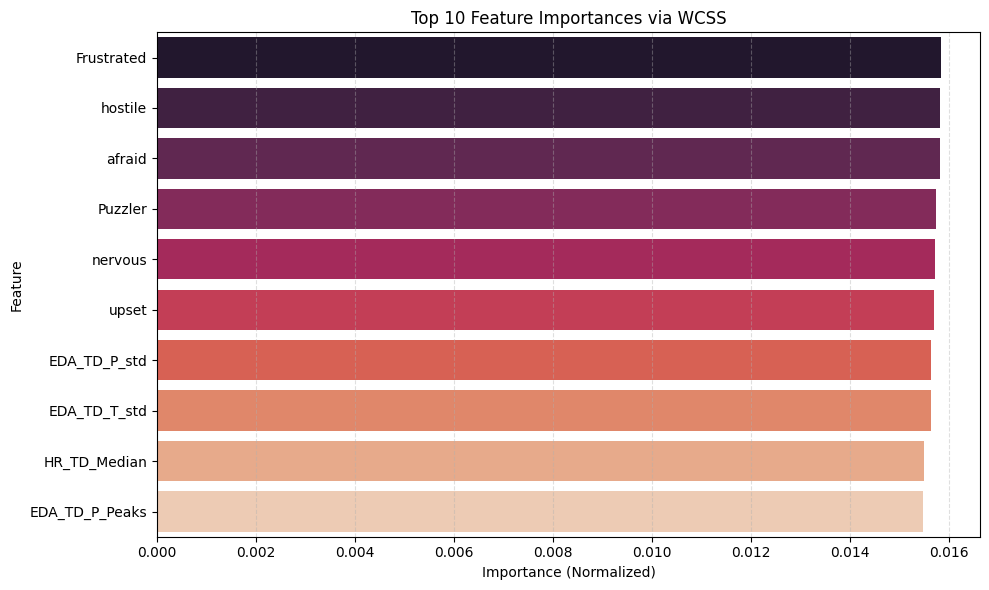

In [37]:
plot_top10_feature_importance(importances, normalize=True, title="Top 10 Feature Importances via WCSS")

In [38]:
def plot_top20_feature_importance(importances, normalize=True, title="Top 20 Feature Importances via WCSS"):
    """
    Visualizes the top 10 feature importances as computed by change in WCSS.

    Parameters:
    - importances: dict, feature name -> Δ WCSS or normalized importance
    - normalize: bool, whether to normalize importances to sum to 1
    - title: str, plot title
    """
    # Optionally normalize
    if normalize:
        total = sum(importances.values())
        importances = {k: v / total for k, v in importances.items()}

    # Sort and slice top 10
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)[:20]
    features, scores = zip(*sorted_importances)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(scores), y=list(features), palette="rocket")
    plt.xlabel("Importance" + (" (Normalized)" if normalize else " (Δ WCSS)"))
    plt.ylabel("Feature")
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


/var/folders/pp/80vw7fpx7jd29s0z090063840000gn/T/ipykernel_97517/3526095469.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(features), palette="rocket")


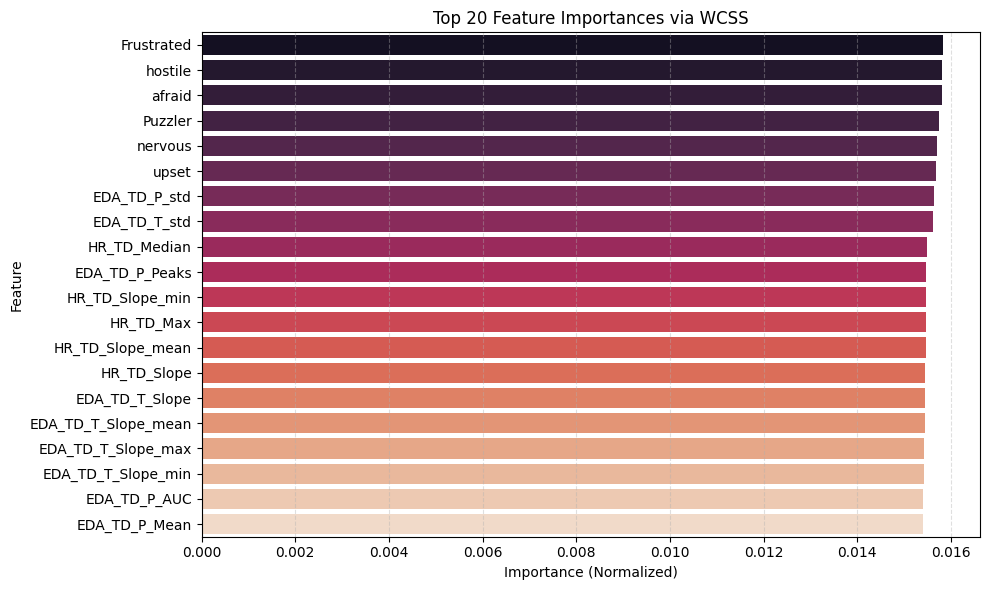

In [39]:
plot_top20_feature_importance(importances, normalize=True, title="Top 20 Feature Importances via WCSS")